In [42]:
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3


#IMPORTING DATA

In [43]:
image_size=[224,224]

train_path="/content/drive/MyDrive/DATASETS/Indian_Currency/training"
test_path="/content/drive/MyDrive/DATASETS/Indian_Currency/valid"


In [44]:
inception=InceptionV3(input_shape=image_size+[3],
                      include_top=False,
                      weights="imagenet")

for layer in inception.layers:
  layer.trainable=False

In [45]:
inception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_282 (Conv2D)             (None, 111, 111, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_282 (BatchN (None, 111, 111, 32) 96          conv2d_282[0][0]                 
__________________________________________________________________________________________________
activation_282 (Activation)     (None, 111, 111, 32) 0           batch_normalization_282[0][0]    
_______________________________________________________________________________________

# MODEL BUILDING

In [46]:
from tensorflow.keras.models import Model

In [50]:
from glob import glob
folders=glob('/content/drive/MyDrive/DATASETS/Indian_Currency/training/*')

In [51]:
x = tf.keras.layers.Flatten()(inception.output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)                  
prediction = tf.keras.layers.Dense(len(folders), activation='softmax')(x)

In [53]:
model=Model(inputs=inception.input,
            outputs=prediction)


In [54]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# IMAGE DATA GENERATOR

In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen= ImageDataGenerator(rescale=1/255)


In [59]:
train_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/DATASETS/Indian_Currency/training",
                                                    batch_size = 10,
                                                    class_mode = 'categorical', 
                                                    target_size = (224, 224))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( "/content/drive/MyDrive/DATASETS/Indian_Currency/validation",
                                                          batch_size  = 10,
                                                          class_mode  = 'categorical', 
                                                          target_size = (224, 224))

Found 804 images belonging to 8 classes.
Found 191 images belonging to 8 classes.


#MODEL FIT

In [61]:
history=model.fit(train_generator,
                  validation_data=validation_generator,
                  epochs=30
                  )

Epoch 1/30
81/81 [==============================] - 36s 442ms/step - loss: 1.0061 - accuracy: 0.7139 - val_loss: 1.0933 - val_accuracy: 0.6283
Epoch 2/30
81/81 [==============================] - 36s 437ms/step - loss: 0.8865 - accuracy: 0.7326 - val_loss: 0.8062 - val_accuracy: 0.7958
Epoch 3/30
81/81 [==============================] - 35s 436ms/step - loss: 0.9018 - accuracy: 0.7500 - val_loss: 2.3397 - val_accuracy: 0.5707
Epoch 4/30
81/81 [==============================] - 35s 436ms/step - loss: 0.9934 - accuracy: 0.7537 - val_loss: 0.7619 - val_accuracy: 0.7644
Epoch 5/30
81/81 [==============================] - 35s 439ms/step - loss: 0.8943 - accuracy: 0.7512 - val_loss: 0.7121 - val_accuracy: 0.8115
Epoch 6/30
81/81 [==============================] - 35s 434ms/step - loss: 0.8372 - accuracy: 0.7711 - val_loss: 0.6526 - val_accuracy: 0.7853
Epoch 7/30
81/81 [==============================] - 35s 439ms/step - loss: 0.7858 - accuracy: 0.7935 - val_loss: 1.5644 - val_accuracy: 0.6545

# VISUALIZING THE RESULTS

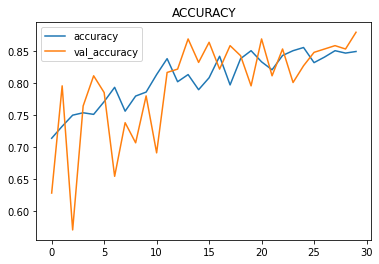

In [63]:
import matplotlib.pyplot as plt

acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
epochs=range(len(acc))

plt.plot(epochs,acc,label="accuracy")
plt.plot(epochs,val_acc,label="val_accuracy")
plt.title("ACCURACY")
plt.legend();

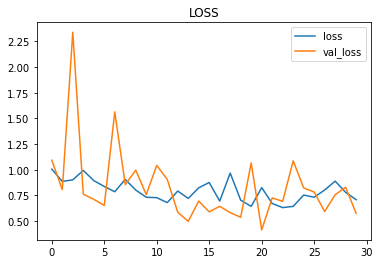

In [64]:
loss=history.history["loss"]
val_loss=history.history["val_loss"]
epochs=range(len(acc))

plt.plot(epochs,loss,label="loss")
plt.plot(epochs,val_loss,label="val_loss")
plt.title("LOSS")
plt.legend();